# Libraries

In [447]:
#importing the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from numpy import linalg
from sklearn.model_selection import train_test_split
import os
import cv2
from sklearn.preprocessing import normalize
import random
from sklearn import metrics
from time import time
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Detection of faces from the dataset

In [448]:
#detecting the faces from the images
j = 0 
detected_faces = []
def extracting_faces(i):
    global j, detected_faces
    img = cv2.imread('Given_Dataset/image_' + str(i+1).zfill(4)+'.jpg')
    image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
    faces_detected = face_cascade.detectMultiScale(image,1.3,5,minSize=(200,200))
    
    for (x, y, w, h) in faces_detected:
        Detected_Face = image[y:y+h,x:x+w]
        Detected_Face = cv2.resize(Detected_Face, (250, 250))
        path = 'detected_faces/face_' + str(j+1).zfill(4) + '.jpg'
        j = j+1 
        detected_faces.append(Detected_Face)
        cv2.imwrite(path, Detected_Face)
        break
        
for i in range(450):
    extracting_faces(i)
    print(j)
#the final value of j printed represents the total number of images in which we can detect the faces

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
158
159
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
186
187
188
189
190
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
259
260
261
262
263
264
265
266
267
268
269
270
271


In [449]:
d = pd.read_csv("labeled_images.csv")
imageshape=detected_faces[0].shape
imageshape

(250, 250)

# Division of training and testing dataset

In [450]:
# dividing the training and testing data in the ratio 80%:20%
x_train, x_test, y_train, y_test = train_test_split(detected_faces, list(d["label_no"]), test_size=0.20, random_state=42)

In [451]:
img_shape = x_train[0].shape
img_shape

(250, 250)

In [452]:
flattened_faces=[]
for i in x_train:
    flattened_faces.append(i.flatten())
len_of_train_set=len(flattened_faces)
flattened_faces=np.array(flattened_faces)
flattened_faces.shape

(342, 62500)

# Principle Component Analysis

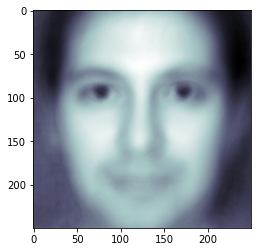

In [453]:
mean_image = np.zeros(flattened_faces[0].shape)
#finding the mean of all the images
for i in range(len_of_train_set):
    mean_image = mean_image + flattened_faces[i]/len_of_train_set
mean_image_reshaped = np.reshape(mean_image, img_shape)
plt.imshow(mean_image_reshaped, cmap="bone")
plt.show()

In [454]:
matrix=[]
for i in flattened_faces:
    matrix.append(i-mean_image)
matrix=np.array(matrix)
print(matrix.shape)
matrix=matrix.T
print("matrix shape:",matrix.shape)
Cov_matrix = np.matmul(matrix.T, matrix)
print("cov_matrix shape:",Cov_matrix.shape)

(342, 62500)
matrix shape: (62500, 342)
cov_matrix shape: (342, 342)


In [455]:
eigen_value, eigen_vector = linalg.eig(Cov_matrix)
index = eigen_value.argsort()[::-1]   
eigen_value = eigen_value[index]
eigen_vector = eigen_vector[:,index]

In [456]:
# K=number of eigen faces considered
K = 36
Keigen_vectors=[]
eigen_faces=[]
for i in range(K):
    Keigen_vectors.append(eigen_vector[:,i])
for i in Keigen_vectors:
    eigen_faces.append(np.matmul(matrix,i))
eigen_faces = [i/linalg.norm(i) for i in eigen_faces]

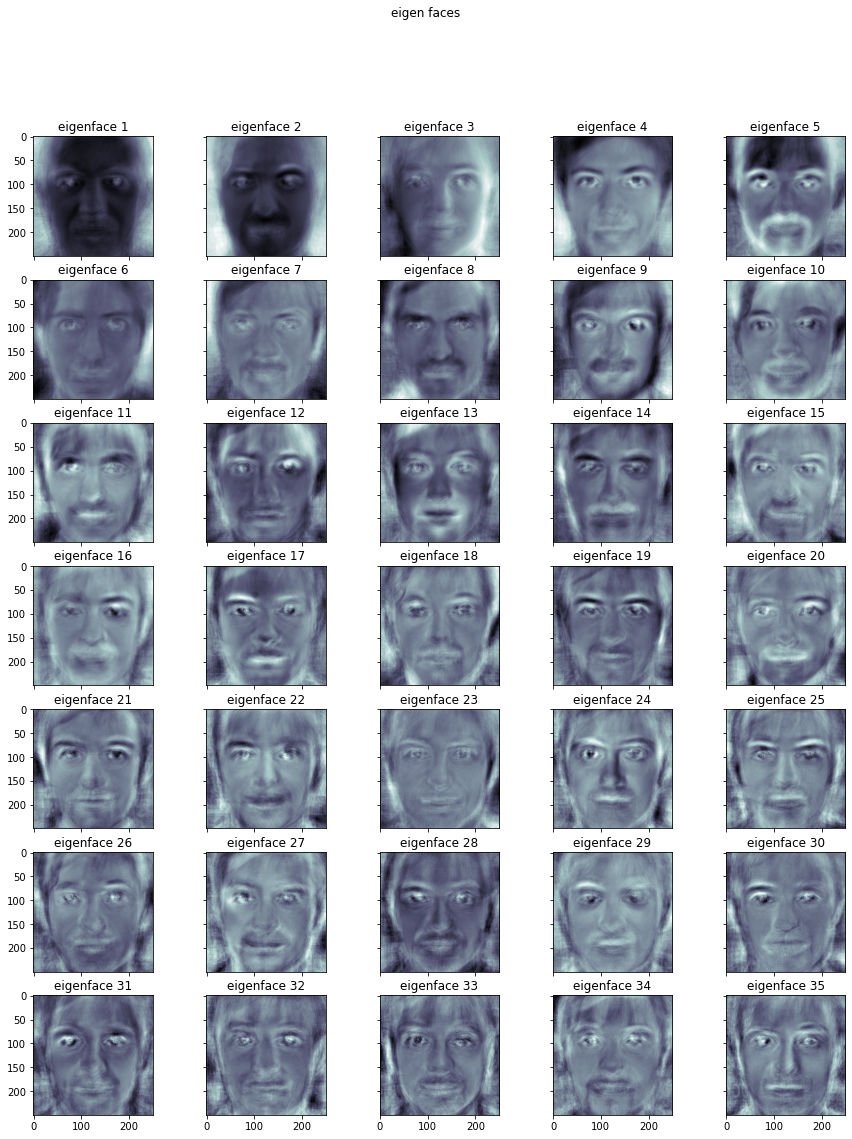

In [457]:
fig, axes = plt.subplots(K//5, 5, sharex=True,sharey=True,figsize=(15, K//2))
fig.suptitle("eigen faces")
for i, ax in enumerate(axes.flat):
    ax.set_title("eigenface "+str(i+1))
    ax.imshow(np.reshape(eigen_faces[i], x_train[0].shape), cmap="bone")
plt.show()

# Outputting a Random image

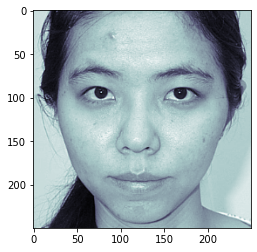

[-1459.89497469  7555.59940036  2999.36478672  4867.58384577
 -2181.68080829  2322.78703184  1488.61119302 -5965.88283207
   929.09797373   295.56118398   437.81546288 -2319.795269
  -157.53655041   -99.32010792  -227.54765745  1666.45076538
  -898.11159216  1684.03663553   438.23524238   195.16956406
   592.87560082   791.87958084  1025.86545569   199.57461681
   389.43240845  -433.30974195   517.93273823  -336.92568267
  -486.73937423    28.31767525  -163.92042323  -386.00561096
  -257.40872606    84.57252182  -374.6812151    807.49803702]


In [458]:
#outputting a random image to just see how well is our model
n=len(x_test)
Randomface = x_test[random.randint(0, n)].flatten()
Randomface_image = np.reshape(Randomface, img_shape)
plt.imshow(Randomface_image, cmap="bone")
plt.show()

psi = Randomface - mean_image
dotpro = np.dot(np.array(eigen_faces), psi.T)
print(dotpro)
lst=[]
for i in range(K):
    lst.append(dotpro[i] * eigen_faces[i])
facesum=sum(lst)
face_sum_image = np.reshape(facesum, img_shape)

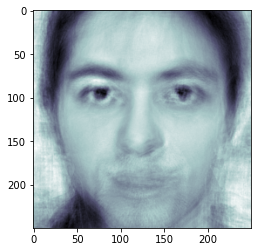

In [459]:
plt.imshow(face_sum_image+mean_image_reshaped, cmap="bone")
plt.show()

# Classifying

In [460]:
from sklearn import decomposition
k = 36
model = decomposition.PCA(n_components=k, whiten=True)
model.fit(np.array(flattened_faces))

PCA(n_components=36, whiten=True)

In [461]:
Weights_train = []
for i, face in enumerate(x_train):
    psi = face.flatten() - mean_image
    z = np.dot(np.array(model.components_), psi.T)
    Weights_train.append(z)
len(Weights_train)

342

In [462]:
Weights_test = []
for i, face in enumerate(x_test):
    psi = face.flatten() - mean_image
    z = np.dot(np.array(model.components_), psi.T)
    Weights_test.append(z)
len(Weights_test)

86

In [463]:
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [464]:
Weights_train = [i.tolist() for i in Weights_train]
Weights_test = [i.tolist() for i in Weights_test]
classification = svm.SVC(C=28, kernel="linear")
classification.fit(Weights_train, y_train)

SVC(C=28, kernel='linear')

In [465]:
print("model:", classification.predict([Weights_test[0]]))
print("true:", y_test[0])

model: [28]
true: 28


# Testing

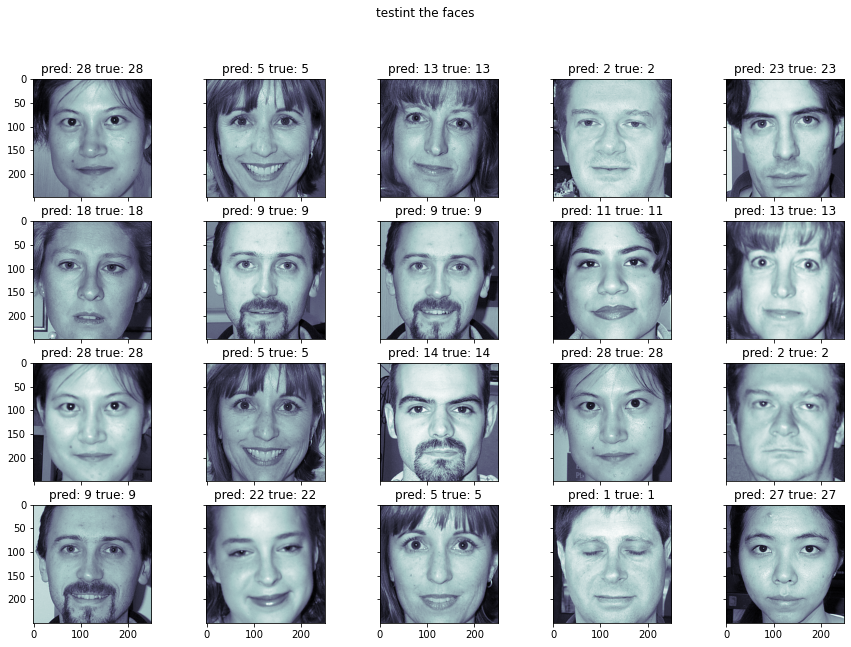

In [466]:
values = y_test[:20]
prediction = classification.predict(Weights_test[:20])

fig, axes = plt.subplots(4, 5, sharex=True,sharey=True,figsize=(15, 10))
fig.suptitle("testint the faces")
for i, j in enumerate(axes.flat):
    j.set_title("pred: "+str(prediction[i])+" "+"true: "+ str(values[i]))
    j.imshow(x_test[i], cmap="bone")
plt.show()

# Testing the Accuracy

In [467]:
t_initial = time()
y_prediction = classification.predict(Weights_train)
print("done in %0.4fs" % (time() - t_initial))
print(classification_report(y_train, y_prediction))
print("Train Score Accuracy:",metrics.accuracy_score(y_train, y_prediction))

done in 0.0412s
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        21
          17       1.00      1.00      1.00         4
          1

In [468]:
t_initial = time()
y_prediction = classification.predict(Weights_test)
print("done in %0.4fs" % (time() - t_initial))
print(classification_report(y_test, y_prediction))
print("Test Score Accuracy:",metrics.accuracy_score(y_test, y_prediction))

done in 0.0050s
              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       0.86      1.00      0.92         6
           3       0.00      0.00      0.00         1
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          18       1.00      1.00      1.00         5
          19       1.00      1.00      1.00         3
          20       0.00      0.00      0.00         0
          21       1.00      1.00      1.00         2
          2